In [ ]:
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import ShuffleSplit
from sklearn.preprocessing import MinMaxScaler

from nirs4all.dataset import DatasetConfigs
from nirs4all.operators.transformations import *
from nirs4all.pipeline import PipelineConfigs, PipelineRunner

x_scaler = MinMaxScaler() # StandardScaler(), RobustScaler(), QuantileTransformer(), PowerTransformer(), LogTransform()
y_scaler = MinMaxScaler()
list_of_preprocessors = [ Detrend, FirstDerivative, SecondDerivative, Gaussian, StandardNormalVariate, SavitzkyGolay, Haar, MultiplicativeScatterCorrection]
splitting_strategy = ShuffleSplit(n_splits=3, test_size=.25)
dataset_folder = '../../sample_data/regression'

pipeline = [
    "chart_2d",
    x_scaler,
    "chart_3d",
    {"y_processing": y_scaler},
    {"feature_augmentation": { "_or_": list_of_preprocessors, "size":[1,(1,2)], "count":5 }}, # Generate all elements of size 1 and of order 1 or 2 (ie. "Gaussian", ["SavitzkyGolay", "Log"], etc.)
    splitting_strategy,
]

for i in range(10, 30, 10):
    pipeline.append(PLSRegression(n_components=i))

pipeline_config = PipelineConfigs(pipeline, "pipeline_Q1")
dataset_config = DatasetConfigs(dataset_folder)

# Create pipeline
runner = PipelineRunner(save_files=False)
run_predictions, other_predictions = runner.run(pipeline_config, dataset_config)

In [ ]:
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
import numpy as np
from nirs4all.dataset.prediction_analyzer import PredictionAnalyzer

analyzer = PredictionAnalyzer(run_predictions)

top_5 = analyzer.get_top_k(5, 'mse')
for i, model in enumerate(top_5, 1):
    print(f"{i}. {model['canonical_model']} (partition: {model['partition_type']}) - RMSE: {model['metrics']['rmse']:.6f}, R²: {model['metrics']['r2']:.6f}, MAE: {model['metrics']['mae']:.6f}")

# Plot top_k comparison
fig = analyzer.plot_top_k_comparison(k=3, metric='r2', partition_type='test')
plt.show()

In [1]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import ShuffleSplit

from nirs4all.dataset import DatasetConfigs
from nirs4all.operators.transformations import *
from nirs4all.pipeline import PipelineConfigs, PipelineRunner

x_scaler = MinMaxScaler() # StandardScaler(), RobustScaler(), QuantileTransformer(), PowerTransformer(), LogTransform()
list_of_preprocessors = [ Detrend, FirstDerivative, SecondDerivative, Gaussian, StandardNormalVariate, SavitzkyGolay, Haar, MultiplicativeScatterCorrection]
splitting_strategy = ShuffleSplit(n_splits=3, test_size=.25)
dataset_folder = '../../sample_data/classification'

pipeline = [
    "chart_2d",
    x_scaler,
    "chart_3d",
    {"feature_augmentation": { "_or_": list_of_preprocessors, "size":[1,(1,2)], "count":5 }}, # Generate all elements of size 1 and of order 1 or 2 (ie. "Gaussian", ["SavitzkyGolay", "Log"], etc.)
    splitting_strategy,
]

for i in range(5, 20, 5):
    pipeline.append(RandomForestClassifier(max_depth=i))

pipeline_config = PipelineConfigs(pipeline, "pipeline_Q1")
dataset_config = DatasetConfigs(dataset_folder)

# Create pipeline
runner = PipelineRunner(save_files=False)
run_predictions, other_predictions = runner.run(pipeline_config, dataset_config)

🚀 Starting pipeline run with 5 pipeline configuration(s) on 1 dataset configuration(s) (5 total runs).
✅ Loaded dataset 'classification' with 48 training and 18 test samples.
📥 Loaded 243 predictions from results\classification\classification_predictions.json
🚀 Starting pipeline config_pipeline_Q1_ccd3a6 on dataset classification
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
🔷 Step 1: chart_2d
🔹 Executing controller SpectraChartController without operator
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
🔷 Step 2: {'class': 'sklearn.preprocessing._data.MinMaxScaler', '_runtime_instance': MinMaxScaler()}
🔹 Executing controller TransformerMixinController with operator MinMaxScaler
------

1. RandomForestClassifier (partition: test_fold) - Accuracy: 0.500000, F1: 0.416667, Precision: 0.388889, Recall: 0.500000
2. RandomForestClassifier (partition: test_fold) - Accuracy: 0.500000, F1: 0.438889, Precision: 0.669444, Recall: 0.500000
3. RandomForestClassifier (partition: test_fold) - Accuracy: 0.416667, F1: 0.358333, Precision: 0.333333, Recall: 0.416667
4. RandomForestClassifier (partition: test_fold) - Accuracy: 0.333333, F1: 0.261905, Precision: 0.275000, Recall: 0.333333
5. RandomForestClassifier (partition: test_fold) - Accuracy: 0.333333, F1: 0.291667, Precision: 0.377778, Recall: 0.333333


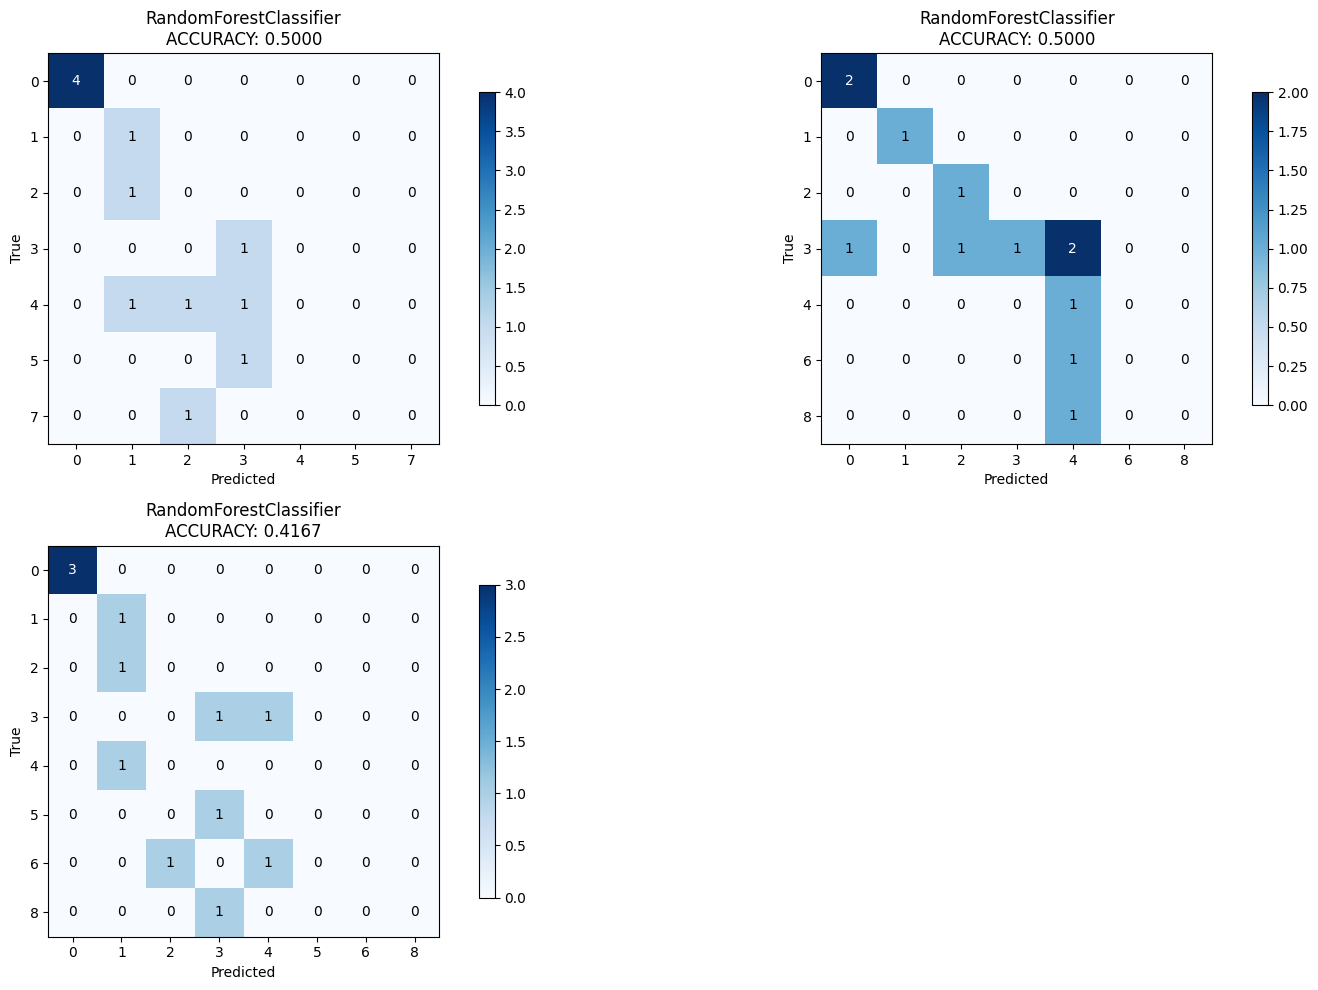

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from nirs4all.dataset.prediction_analyzer import PredictionAnalyzer

analyzer = PredictionAnalyzer(run_predictions)

top_5 = analyzer.get_top_k(5, 'accuracy')
for i, model in enumerate(top_5, 1):
    # print(model)
    print(f"{i}. {model['canonical_model']} (partition: {model['partition_type']}) - Accuracy: {model['metrics']['accuracy']:.6f}, F1: {model['metrics']['f1']:.6f}, Precision: {model['metrics']['precision']:.6f}, Recall: {model['metrics']['recall']:.6f}")

# Plot top_k comparison
fig = analyzer.plot_top_k_confusionMatrix(k=3, metric='accuracy', partition_type='test')
plt.show()